## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on = ['Mouse ID'] )


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = merged_df['Mouse ID'].nunique()

number_of_mice

249

In [3]:
#total number of mice (not unique only)
len(merged_df['Mouse ID'])

1893

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

grouped_df = merged_df.groupby(['Mouse ID'])
duplicated = grouped_df['Timepoint'].value_counts()
duplicated =pd.DataFrame(duplicated)
grouped_dup = duplicated.loc[(duplicated['Timepoint'] > 1)]
grouped_dup

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_group = merged_df[merged_df['Mouse ID'] == 'g989']

#pd.merge(grouped_dup, merged_df, on = ['Mouse ID'] , how = "left")

#mouse_group = mouse_group['Mouse ID','Drug Regime','Sex','Age_months','Weight (g)','Tumor Volume (mm3)','Metastatic Sites']
mouse_group

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


merged_clean = merged_df[merged_df['Mouse ID']!='g989']
merged_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice in the clean DataFrame.

len(merged_clean['Mouse ID'])

1880

In [38]:
#number of unique mice
number_of_mice_clean = merged_clean['Mouse ID'].nunique()

number_of_mice_clean

248

In [39]:
# showing that mouse g89 is not in the clean dataframe
show = merged_clean[merged_clean['Mouse ID']=='g989']
show

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [40]:
grouped_drug = merged_clean.groupby(['Drug Regimen'])
grouped_drug.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor = merged_clean['Tumor Volume (mm3)'].groupby(merged_clean['Drug Regimen']).mean()
median_tumor = merged_clean['Tumor Volume (mm3)'].groupby(merged_clean['Drug Regimen']).median()
variance_tumor = merged_clean['Tumor Volume (mm3)'].groupby(merged_clean['Drug Regimen']).var()
std_tumor = merged_clean['Tumor Volume (mm3)'].groupby(merged_clean['Drug Regimen']).std()
sem_tumor = merged_clean['Tumor Volume (mm3)'].groupby(merged_clean['Drug Regimen']).sem()
 
summary_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor, 
                            "Median Tumor Volume":median_tumor, 
                           "Tumor Volume Variance":variance_tumor, 
                           "Tumor Volume Std. Dev.":std_tumor, 
                           "Tumor Volume Std. Err.":sem_tumor})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = merged_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

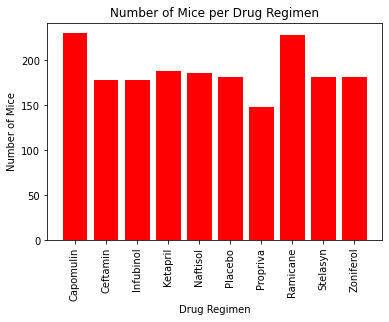

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = np.arange(len(grouped_drug['Drug Regimen']))
number_mice = grouped_drug['Mouse ID'].count()
number_mice_df = number_mice.to_frame()
y_axis = number_mice_df["Mouse ID"]

#plotting bar graph
plt.bar(x_axis, y_axis, color = 'red')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')

labels_positions = [value for value in x_axis]
labels = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol",
         "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
plt.xticks(labels_positions, labels,rotation=90)

plt.show()


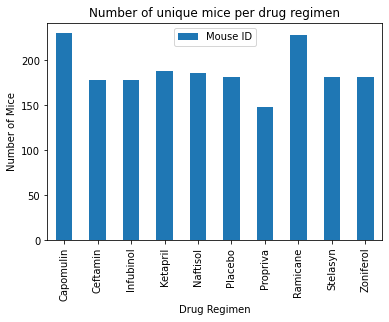

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
number_mice_df.plot(kind = 'bar')
plt.title('Number of unique mice per drug regimen')
plt.ylabel('Number of Mice')
plt.show()

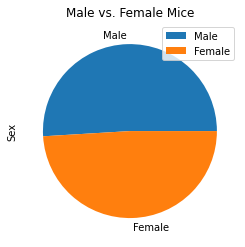

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = merged_clean["Sex"].value_counts()
male_female_df = male_female.to_frame()
male_female_pie = male_female_df.plot(kind = 'pie', y = 'Sex', title = "Male vs. Female Mice")

plt.show()



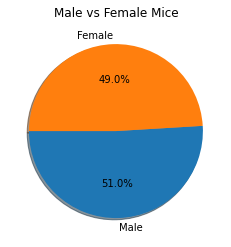

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']

plt.pie(male_female, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = merged_clean.loc[merged_clean['Drug Regimen'] == 'Capomulin']
ramicane_df = merged_clean.loc[merged_clean['Drug Regimen'] == 'Ramicane']
infubinol_df = merged_clean.loc[merged_clean['Drug Regimen'] == 'Infubinol']
ceftamin_df = merged_clean.loc[merged_clean['Drug Regimen'] == 'Ceftamin']

treatments_df = pd.concat([capomulin_df, ramicane_df, infubinol_df, ceftamin_df])
#treatments_df

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = grouped_df["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_dfs = pd.merge(treatments_df, greatest_timepoint, on = 'Mouse ID')
merged_dfs["MaxTime"] = merged_dfs["Timepoint_x"] == merged_dfs["Timepoint_y"]
#merged_dfs
merged_dfs.drop(merged_dfs.loc[merged_dfs['MaxTime']==False].index, inplace=True)
#merged_dfs

tumor_volume = merged_dfs[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months',
                           'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites']]
tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,s185,Capomulin,Female,3,17,23.343598,1
19,x401,Capomulin,Female,16,15,28.484033,0
29,m601,Capomulin,Male,22,17,28.430964,1
34,f966,Capomulin,Male,16,17,30.485985,0
44,u364,Capomulin,Male,18,17,31.023923,3
...,...,...,...,...,...,...,...
773,x226,Ceftamin,Male,23,28,45.000000,0
783,x581,Ceftamin,Female,19,28,64.634949,3
793,x822,Ceftamin,Male,3,29,61.386660,3
803,y769,Ceftamin,Female,6,27,68.594745,4


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drugs in treatments:
    volume = tumor_volume.loc[tumor_volume["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
    tumor_volume_list.append(volume)
    #print(tumor_volume_list)
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > upper_bound) | (volume < lower_bound)]
    if len(outliers) > 0:
        print(f"Outliers for {drugs} are {outliers}.")
    

Outliers for Infubinol are 506    36.321346
Name: Tumor Volume (mm3), dtype: float64.


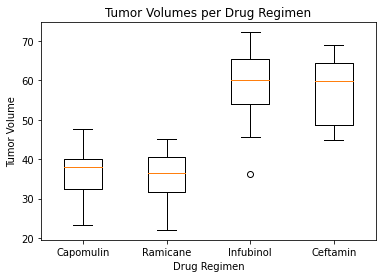

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels = treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes per Drug Regimen")
plt.show()

## Line and Scatter Plots

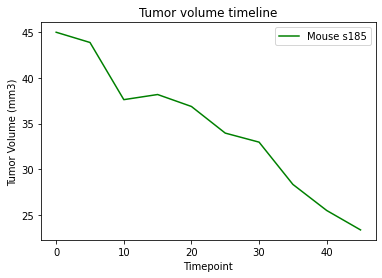

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']

x_capomulin = mouse_capomulin['Timepoint']
y_capomulin = mouse_capomulin['Tumor Volume (mm3)']

plt.plot(x_capomulin, y_capomulin, color = 'green', label = 'Mouse s185')
plt.legend(loc = 'best')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Tumor volume timeline')
plt.show()

Text(0.5, 1.0, 'Average Tumor Volume VS. Mouse Weight - Capomulin')

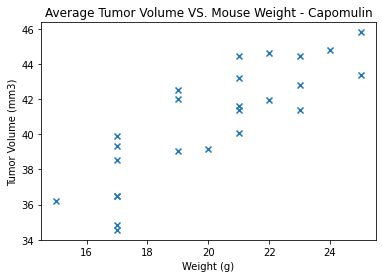

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_capomulin = capomulin_df.groupby('Mouse ID')
mice_weight = mice_capomulin['Weight (g)'].mean()
mice_tumor_volume = mice_capomulin['Tumor Volume (mm3)'].mean()

mice_capomulin_df = pd.DataFrame({'Weight (g)': mice_weight,
                                 'Tumor Volume (mm3)': mice_tumor_volume})
#plot
x_capomulin = mice_capomulin_df['Weight (g)']
y_capomulin = mice_capomulin_df['Tumor Volume (mm3)']

plt.scatter(x_capomulin, y_capomulin, marker = 'x')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume VS. Mouse Weight - Capomulin')

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


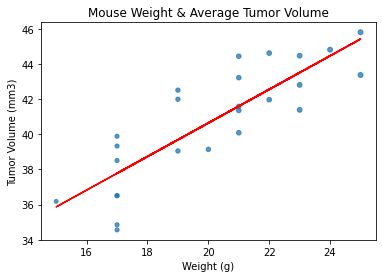

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_capomulin = mice_capomulin_df['Weight (g)']
y_capomulin = mice_capomulin_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_capomulin, y_capomulin)
regress = x_capomulin * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter

plt.scatter(x_capomulin, y_capomulin, marker="o", s=x_capomulin, alpha=0.75)
plt.title("Mouse Weight & Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#line

plt.plot(x_capomulin,regress,"r-")

#correlation coef.
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_capomulin,y_capomulin)[0],2)}")

plt.show()